<H3> PYTHON 3

<H6>Импортируем необходимые библиотеки, убираем предупреждения Anaconda

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

<H6>Сгенерируем выборку объёма 1000 из непрерывного распределения Парето (с  b=5). 
Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других. Вне области экономики иногда называется также распределением Брэдфорда.

In [2]:
b = 5
pareto = sts.pareto(b)
sample = pareto.rvs(1000)

<H6>Построим гистограмму выборки, и, поверх нее, теоретическую плотность распределения.

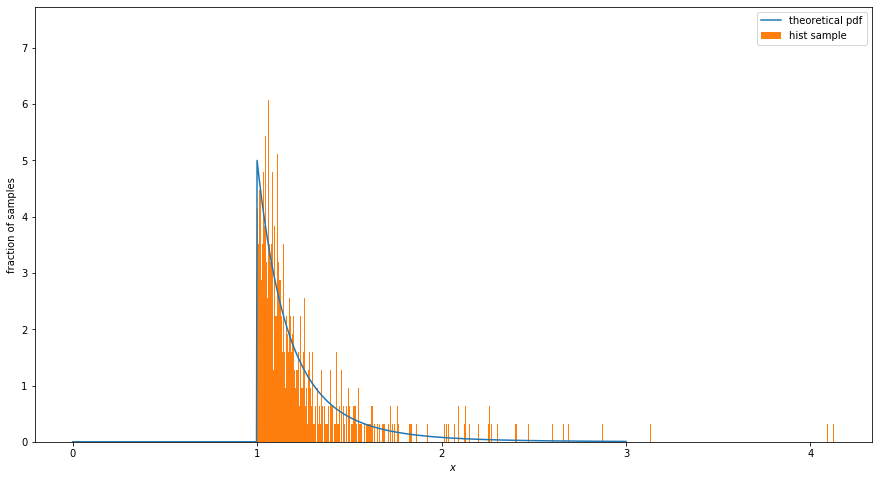

In [3]:
x_par = np.linspace(0,3, 1000)
pdf = pareto.pdf(x_par)
plt.figure(figsize=(15, 8))
plt.plot(x_par, pdf, label='theoretical pdf')
plt.hist(sample, normed=True, bins = 1000, label = 'hist sample')

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='upper right')

<H6>Посчитаем среднее и дисперсию распределения Парето при разных n

In [4]:
meanp = pareto.mean()
std = pareto.std()
n5 = 5
n15 = 15
n50 = 100
std5 = std/math.sqrt(n5) #при n = 5
std15 = std/math.sqrt(n15) #при n = 15
std50 = std/math.sqrt(n50) #при n = 50
print('Среднее распределения 𝜇:', meanp, '\n'
      'Стандартное отклонение при n =  5:', std5,'\n'
     'Стандартное отклонение при n = 15:', std15,'\n'
     'Стандартное отклонение при n = 50:', std50,'\n')

Среднее распределения 𝜇: 1.25 
Стандартное отклонение при n =  5: 0.14433756729740643 
Стандартное отклонение при n = 15: 0.08333333333333333 
Стандартное отклонение при n = 50: 0.03227486121839514 



<H6>Cгенерируем 1000 выборок объёма 5 и построим гистограммы распределений их выборочных средних, поверх гистограммы построим плотность соответствующего нормального распределения с расчитанными выше средним и дисперсией

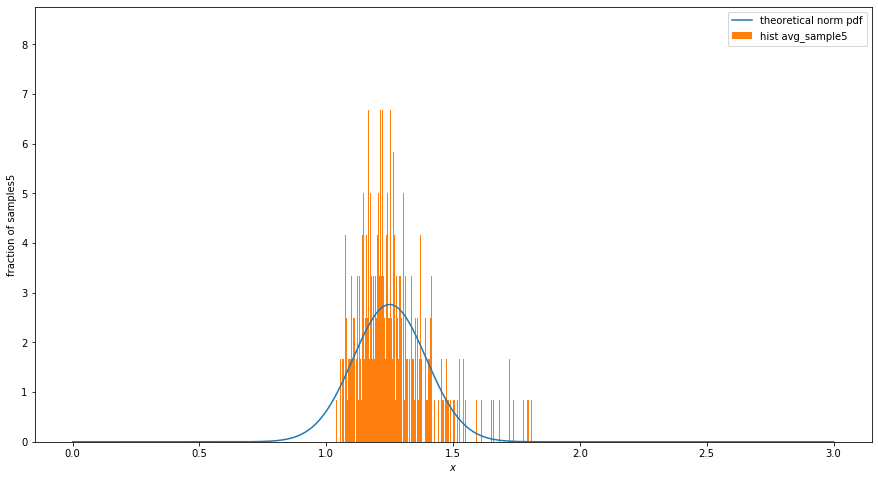

In [5]:
x = np.linspace(0,3, 1000) 
norm_rv5 = sts.norm(meanp, std5)
pdf_norm5 = norm_rv5.pdf(x)
X5 = []
for i in range(1000):
    sample5 = pareto.rvs(n5)
    avg5 = np.mean(sample5)
    X5.append(avg5)
plt.figure(figsize=(15, 8))
plt.plot(x, pdf_norm5, label='theoretical norm pdf')

plt.hist(X5, normed=True, bins = 1000, label = 'hist avg_sample5')
plt.ylabel('fraction of samples5')
plt.xlabel('$x$')
plt.legend(loc='upper right')

<H6>Сгенерируем 1000 выборок объёма 15 и построим гистограммы распределений их выборочных средних, поверх гистограммы построим плотность соответствующего нормального распределения с расчитанными выше средним и дисперсией

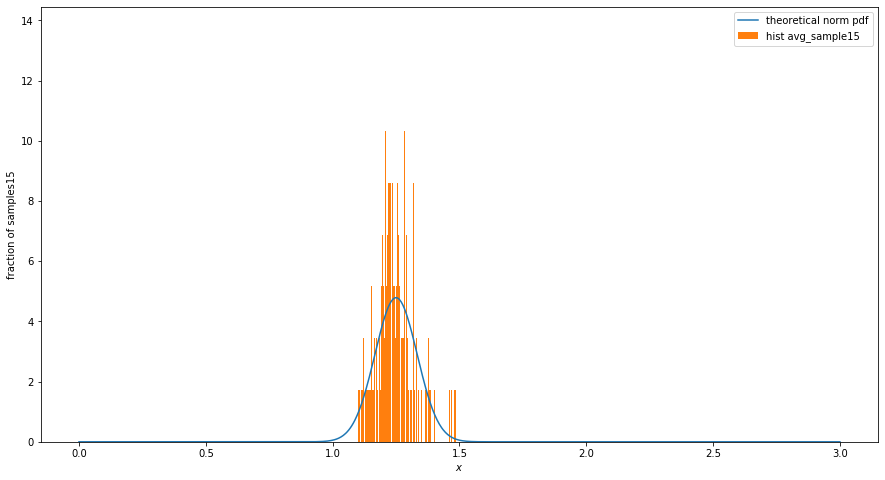

In [6]:
norm_rv15 = sts.norm(meanp, std15)
pdf_norm15 = norm_rv15.pdf(x)
X15 = []
for i in range(1000):
    sample15 = pareto.rvs(n15)
    avg15 = np.mean(sample15)
    X15.append(avg15)

plt.figure(figsize=(15, 8))
plt.plot(x, pdf_norm15, label='theoretical norm pdf')    
    
plt.hist(X15, normed=True, bins = 1000, label = 'hist avg_sample15')
plt.ylabel('fraction of samples15')
plt.xlabel('$x$')
plt.legend(loc='upper right')

<H6>Сгенерируем 1000 выборок объёма 50 и построим гистограммы распределений их выборочных средних, поверх гистограммы построим плотность соответствующего нормального распределения с расчитанными выше средним и дисперсией

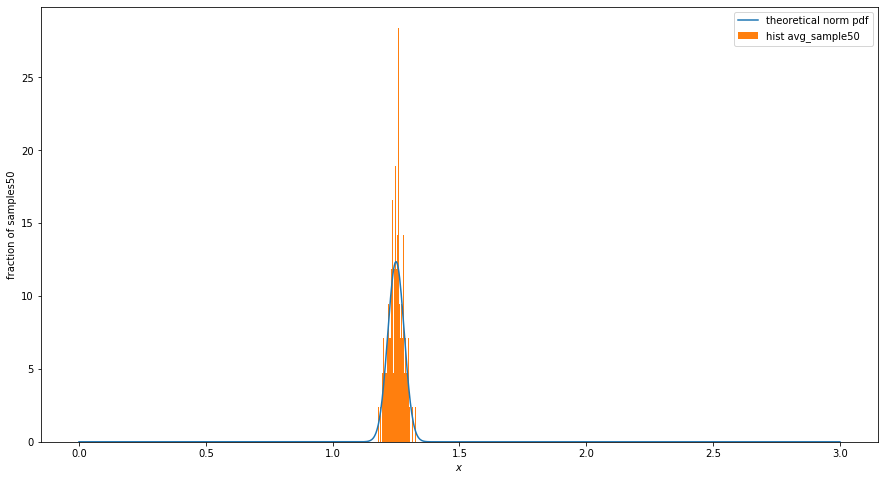

In [9]:
norm_rv50 = sts.norm(meanp, std50)
pdf_norm50 = norm_rv50.pdf(x)
X50 = []
for i in range(1000):
    sample50 = pareto.rvs(n50)
    avg50 = np.mean(sample50)
    X50.append(avg50)

plt.figure(figsize=(15, 8))
plt.plot(x, pdf_norm50, label='theoretical norm pdf',)       
    
plt.hist(X50, normed=True, bins = 1000, label = 'hist avg_sample50')
plt.ylabel('fraction of samples50')
plt.xlabel('$x$')
plt.legend(loc='upper right')

<H5> Вывод: при увеличении n, распределение выборочных средних становится похожим на плотность соответствующего нормального распределение при среднем 𝜇 равном среднему распределения Парето, и дисперсии равной дисперсии распределения Парето деленое на n. Мы доказали, что центральная предельная теорема работает для непрерывного распределения Парето.